<a href="https://colab.research.google.com/github/KiroSafwat/DeepLearning/blob/main/Deep_Learning_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧠 Deep Learning Practical Assignment (Adult Income Dataset)

## 📌 Dataset
We will use the **Adult Income dataset** (also known as the Census Income dataset).  
The task is to predict whether a person earns **more than $50K/year** based on demographic and employment attributes.

---


In [1]:
# Option 1: Using OpenML via scikit-learn
from sklearn.datasets import fetch_openml
import pandas as pd

# Load dataset from OpenML
adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame

print(df.head())
print(df.shape)  # (48842, 15)

# Separate features and target
X = df.drop(columns="class")
y = df["class"]


   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country  class  
0       

## Part 0: Data Preparation
1. Load the dataset into a DataFrame.
2. Split the data into **training, validation, and test sets**.  
   - Suggested: 70% training, 15% validation, 15% test.
3. Apply any necessary preprocessing:
   - Handle categorical features (encoding).
   - Scale numerical features if needed.
4. After training your models, always report results on:
   - **Training accuracy**
   - **Validation accuracy**
   - **Test accuracy**
5. At the end of the assignment, **compare all methods** across train, validation, and test sets.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import pandas as pd

adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame
X = df.drop(columns="class")
y = df["class"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

X_train_prep = preprocessor.fit_transform(X_train)
X_valid_prep = preprocessor.transform(X_valid)
X_test_prep = preprocessor.transform(X_test)



## Part 1: Optimizers
1. Train the same neural network using:
   - Stochastic Gradient Descent (SGD)
   - SGD with Momentum
   - Adam
2. Compare the training and validation accuracy for each optimizer.
3. Which optimizer converges the fastest? Which gives the best generalization?
4. Explain *why* Adam often performs better than plain SGD.

---


In [7]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np
import tensorflow as tf
from tensorflow import keras

adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame
X = df.drop(columns="class")
y = df["class"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

num_cols = X.select_dtypes(include=['float64', 'int64']).columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown="ignore"), cat_cols)
])

X_train_prep = preprocessor.fit_transform(X_train)
X_valid_prep = preprocessor.transform(X_valid)
X_test_prep = preprocessor.transform(X_test)

X_train_prep = np.array(X_train_prep.todense() if hasattr(X_train_prep, "todense") else X_train_prep, dtype=float)
X_valid_prep = np.array(X_valid_prep.todense() if hasattr(X_valid_prep, "todense") else X_valid_prep, dtype=float)
X_test_prep = np.array(X_test_prep.todense() if hasattr(X_test_prep, "todense") else X_test_prep, dtype=float)

y_train = (y_train == '>50K').astype(int)
y_valid = (y_valid == '>50K').astype(int)
y_test  = (y_test == '>50K').astype(int)

optimizers = {
    "SGD": keras.optimizers.SGD(learning_rate=0.01),
    "SGD_Momentum": keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "Adam": keras.optimizers.Adam(learning_rate=0.001)
}

results = {}

for name, opt in optimizers.items():
    model = keras.Sequential([
        keras.layers.Input(shape=(X_train_prep.shape[1],)),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train_prep, y_train, validation_data=(X_valid_prep, y_valid), epochs=10, batch_size=32, verbose=0)
    results[name] = {
        "train_acc": history.history['accuracy'][-1],
        "val_acc": history.history['val_accuracy'][-1]
    }

for k, v in results.items():
    print(f"{k}: Train Acc={v['train_acc']:.4f}, Val Acc={v['val_acc']:.4f}")


SGD: Train Acc=0.8557, Val Acc=0.8579
SGD_Momentum: Train Acc=0.8601, Val Acc=0.8654
Adam: Train Acc=0.8688, Val Acc=0.8617


## Part 2: Batch Size
1. Train the same model with different batch sizes (e.g., 1, 32, 128, 1024).
2. Compare:
   - Training speed
   - Validation accuracy
   - Test accuracy
   - Generalization ability
3. Which batch size leads to the **noisiest gradient updates**?
4. Which batch size generalizes better and why?

In [9]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame
X = df.drop(columns="class")
y = (df["class"] == ">50K").astype(int)

num = X.select_dtypes(include=['int64', 'float64']).columns
cat = X.select_dtypes(include=['object', 'category']).columns
ct = ColumnTransformer([("num", StandardScaler(), num), ("cat", OneHotEncoder(handle_unknown="ignore"), cat)])
X_prep = ct.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_prep, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

batch_sizes = [1, 32, 128, 1024]
for bs in batch_sizes:
    print(f"\nBatch Size = {bs}")
    model = keras.Sequential([keras.layers.Dense(32, activation='relu'),
                              keras.layers.Dense(16, activation='relu'),
                              keras.layers.Dense(1, activation='sigmoid')])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=3, batch_size=bs, verbose=0)
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    print("Test Accuracy:", acc)



Batch Size = 1
Test Accuracy: 0.8646103739738464

Batch Size = 32
Test Accuracy: 0.8659751415252686

Batch Size = 128
Test Accuracy: 0.864883303642273

Batch Size = 1024
Test Accuracy: 0.8516445755958557



## Part 3: Overfitting and Regularization
1. Train a large neural network (many parameters) on the dataset.
2. Observe training vs. validation accuracy.  
   - Do you see signs of overfitting?
3. Apply regularization techniques:
   - **L2 regularization**
   - **Dropout**
4. Compare the validation results before and after regularization.
5. Which regularization method was more effective in reducing overfitting? Why?

---


In [10]:
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame
X = df.drop(columns="class")
y = (df["class"] == ">50K").astype(int)

num = X.select_dtypes(include=['int64', 'float64']).columns
cat = X.select_dtypes(include=['object', 'category']).columns
ct = ColumnTransformer([("num", StandardScaler(), num), ("cat", OneHotEncoder(handle_unknown="ignore"), cat)])
X_prep = ct.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_prep, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nWithout Regularization:")
model1 = keras.Sequential([
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5, batch_size=128, verbose=0)
print(model1.evaluate(X_valid, y_valid, verbose=0))

print("\nWith L2 Regularization + Dropout:")
model2 = keras.Sequential([
    keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5, batch_size=128, verbose=0)
print(model2.evaluate(X_valid, y_valid, verbose=0))



Without Regularization:
[0.30644339323043823, 0.8626808524131775]

With L2 Regularization + Dropout:
[0.3600572347640991, 0.8574938774108887]


## Part 4: Early Stopping
1. Train the model for many epochs without early stopping.  
   - Plot training, validation, and test curves.
2. Train again with **early stopping** (monitor validation loss).
3. Compare the number of epochs trained and the final validation/test accuracy.
4. Explain how early stopping helps prevent overfitting.

---

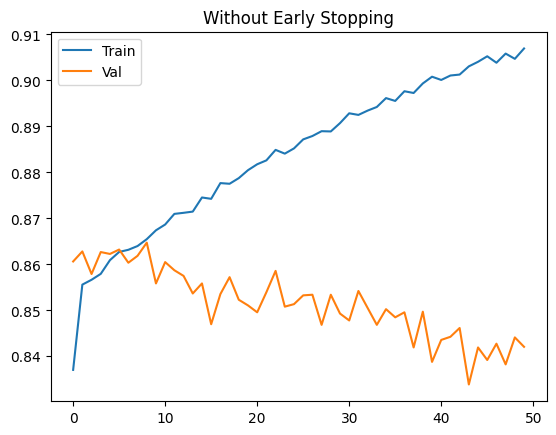

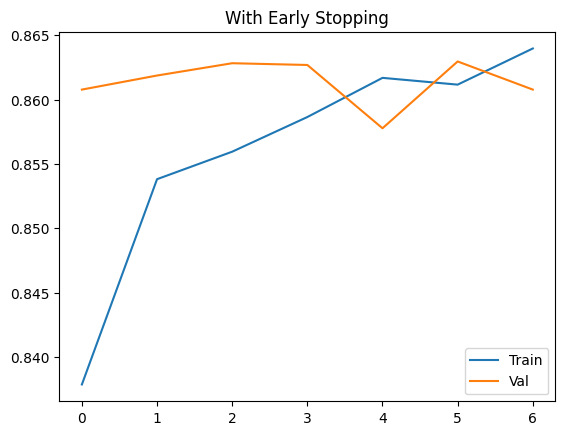

Without Early Stopping Test Acc: 0.8455029129981995
With Early Stopping Test Acc: 0.8646103739738464


In [11]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

adult = fetch_openml(name="adult", version=2, as_frame=True)
df = adult.frame
X = df.drop(columns="class")
y = (df["class"] == ">50K").astype(int)

num = X.select_dtypes(include=['int64', 'float64']).columns
cat = X.select_dtypes(include=['object', 'category']).columns
ct = ColumnTransformer([("num", StandardScaler(), num), ("cat", OneHotEncoder(handle_unknown="ignore"), cat)])
X_prep = ct.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(X_prep, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h1 = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=128, verbose=0)

plt.plot(h1.history['accuracy'], label='Train')
plt.plot(h1.history['val_accuracy'], label='Val')
plt.legend()
plt.title('Without Early Stopping')
plt.show()

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model2 = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
h2 = model2.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=50, batch_size=128, callbacks=[early_stop], verbose=0)

plt.plot(h2.history['accuracy'], label='Train')
plt.plot(h2.history['val_accuracy'], label='Val')
plt.legend()
plt.title('With Early Stopping')
plt.show()

print("Without Early Stopping Test Acc:", model.evaluate(X_test, y_test, verbose=0)[1])
print("With Early Stopping Test Acc:", model2.evaluate(X_test, y_test, verbose=0)[1])


## Part 5: Reflection
1. Summarize what you learned about:
   - The role of optimizers
   - The effect of batch size
   - Regularization methods
   - Early stopping
   - Train/validation/test splits
2. If you had to train a deep learning model on a new tabular dataset, what choices would you make for:
   - Optimizer
   - Batch size
   - Regularization
   - Early stopping
   - Data splitting strategy  
   and why?